In [332]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, f1_score, precision_score, recall_score

#### Week1:
Project Task: Week 1

Exploratory Data Analysis (EDA):

1.    Perform an EDA on the Dataset.
       a)    Check all the latent features and parameters with their mean and standard deviation. Value are close to 0 centered (mean)
              with unit standard deviation
       b)    Find if there is any connection between Time, Amount, and the transaction being fraudulent.
2.    Check the class count for each class. It’s a class Imbalance problem.
3.    Use techniques like undersampling or oversampling before running Naïve Bayes, Logistic Regression or SVM.
       a.    Oversampling or undersampling can be used to tackle the class imbalance problem
       b.    Oversampling increases the prior probability of imbalanced class and in case of other classifiers, error gets multiplied as the 
              low-proportionate class is mimicked multiple times.
4     Following are the matrices for evaluating the model performance: Precision, Recall, F1-Score, AUC-ROC curve. Use F1-Score as
       the evaluation criteria for this project.

In [333]:
train=pd.read_csv("/sanj/Simpli learn/AI Capstone/Project 2-Finance-Datasets/Financial/train_data.csv")
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [334]:
train.shape

(227845, 31)

In [335]:
test= pd.read_csv("/sanj/Simpli learn/AI Capstone/Project 2-Finance-Datasets/Financial/test_data.csv")
test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,113050.0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,...,-0.042711,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89
1,26667.0,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,...,0.926255,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00
2,159519.0,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,...,-0.408289,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70
3,137545.0,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,...,-0.199280,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99
4,63369.0,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,...,0.059880,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00


In [336]:
test.shape

(56962, 30)

In [337]:
test_Hidden= pd.read_csv("/sanj/Simpli learn/AI Capstone/Project 2-Finance-Datasets/Financial/test_data_hidden.csv")
test_Hidden.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,113050.0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,26667.0,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,159519.0,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,137545.0,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,63369.0,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [338]:
test_Hidden.shape

(56962, 31)

## EDA

In [339]:
train.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
test.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [8]:
test_Hidden.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Check all the latent features(hidden features) and parameters with their mean and standard deviation. OBservation:Values are close to 0 centered (mean) with unit standard deviation

In [9]:
test_Hidden.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,...,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,95057.882360,0.013286,0.006610,-0.004263,0.001496,-0.003508,-0.003079,0.000141,-0.006501,0.001564,...,-0.002253,-0.004938,0.004008,-0.001017,-0.000872,0.004513,0.001385,-0.001990,87.658797,0.001720
std,47438.688395,1.941231,1.611224,1.516853,1.419107,1.431731,1.359647,1.301800,1.201138,1.103688,...,0.735871,0.730301,0.621623,0.604191,0.521003,0.481857,0.416750,0.325640,258.042879,0.041443
min,2.000000,-36.510583,-47.429676,-48.325589,-5.560118,-113.743307,-20.054615,-28.215112,-41.484823,-9.481456,...,-21.620120,-8.593642,-32.828995,-2.822684,-8.696627,-1.778061,-8.878665,-15.430084,0.000000,0.000000
25%,54286.250000,-0.908591,-0.600208,-0.893961,-0.847617,-0.694059,-0.770145,-0.551096,-0.211190,-0.642072,...,-0.230210,-0.549030,-0.160179,-0.356599,-0.315738,-0.322766,-0.070204,-0.052351,5.615000,0.000000
50%,85226.500000,0.036251,0.061840,0.170910,-0.022094,-0.051828,-0.278939,0.039155,0.019903,-0.052607,...,-0.032379,-0.000329,-0.009334,0.040045,0.018074,-0.047859,0.001451,0.011354,21.900000,0.000000
75%,139235.000000,1.319727,0.801163,1.016897,0.738688,0.615454,0.392801,0.569769,0.324905,0.599634,...,0.184809,0.524484,0.149985,0.437657,0.348895,0.245286,0.090737,0.077483,77.500000,0.000000
max,172785.000000,2.446505,18.902453,3.985446,15.304184,29.016124,73.301626,120.589494,18.282168,10.370658,...,22.614889,6.790452,20.803344,4.584549,7.519589,3.517346,31.612198,22.620072,25691.160000,1.000000


In [10]:
test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,...,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,95057.882360,0.013286,0.006610,-0.004263,0.001496,-0.003508,-0.003079,0.000141,-0.006501,0.001564,...,-0.002685,-0.002253,-0.004938,0.004008,-0.001017,-0.000872,0.004513,0.001385,-0.001990,87.658797
std,47438.688395,1.941231,1.611224,1.516853,1.419107,1.431731,1.359647,1.301800,1.201138,1.103688,...,0.764450,0.735871,0.730301,0.621623,0.604191,0.521003,0.481857,0.416750,0.325640,258.042879
min,2.000000,-36.510583,-47.429676,-48.325589,-5.560118,-113.743307,-20.054615,-28.215112,-41.484823,-9.481456,...,-54.497720,-21.620120,-8.593642,-32.828995,-2.822684,-8.696627,-1.778061,-8.878665,-15.430084,0.000000
25%,54286.250000,-0.908591,-0.600208,-0.893961,-0.847617,-0.694059,-0.770145,-0.551096,-0.211190,-0.642072,...,-0.211598,-0.230210,-0.549030,-0.160179,-0.356599,-0.315738,-0.322766,-0.070204,-0.052351,5.615000
50%,85226.500000,0.036251,0.061840,0.170910,-0.022094,-0.051828,-0.278939,0.039155,0.019903,-0.052607,...,-0.061739,-0.032379,-0.000329,-0.009334,0.040045,0.018074,-0.047859,0.001451,0.011354,21.900000
75%,139235.000000,1.319727,0.801163,1.016897,0.738688,0.615454,0.392801,0.569769,0.324905,0.599634,...,0.131241,0.184809,0.524484,0.149985,0.437657,0.348895,0.245286,0.090737,0.077483,77.500000
max,172785.000000,2.446505,18.902453,3.985446,15.304184,29.016124,73.301626,120.589494,18.282168,10.370658,...,19.746453,22.614889,6.790452,20.803344,4.584549,7.519589,3.517346,31.612198,22.620072,25691.160000


In [11]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94752.853076,-0.003321,-0.001652,0.001066,-0.000374,0.000877,0.000770,-0.000035,0.001625,-0.000391,...,0.000563,0.001234,-0.001002,0.000254,0.000218,-0.001128,-0.000346,0.000498,88.522327,0.001729
std,47500.410602,1.963028,1.661178,1.516107,1.415061,1.367074,1.325341,1.220384,1.192648,1.097367,...,0.734187,0.724544,0.625165,0.606012,0.521348,0.482314,0.400286,0.331184,248.100141,0.041548
min,0.000000,-56.407510,-72.715728,-32.965346,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54182.000000,-0.922851,-0.598040,-0.889246,-0.848884,-0.690811,-0.767803,-0.554761,-0.207838,-0.643365,...,-0.228031,-0.540792,-0.162264,-0.354099,-0.317450,-0.327910,-0.070986,-0.053117,5.590000,0.000000
50%,84607.000000,0.012663,0.066665,0.182170,-0.019309,-0.055243,-0.273025,0.040409,0.022928,-0.050932,...,-0.028807,0.008697,-0.011614,0.041212,0.016221,-0.053257,0.001315,0.011216,22.000000,0.000000
75%,139340.000000,1.314821,0.804401,1.029449,0.744822,0.610852,0.400298,0.570631,0.327854,0.596671,...,0.186852,0.529535,0.147067,0.440051,0.351214,0.239885,0.091105,0.078458,77.070000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,6.070850,3.463246,12.152401,33.847808,19656.530000,1.000000


In [340]:
# Let's convert the time from seconds to hours to ease the interpretation.
train.loc[:,'Time'] = train.Time / 3600
test_Hidden.loc[:,'Time'] = test_Hidden.Time / 3600
test.loc[:,'Time'] = test.Time / 3600

In [13]:
train['Class'].value_counts()
#It’s a class Imbalance problem.

0    227451
1       394
Name: Class, dtype: int64

In [14]:
test_Hidden['Class'].value_counts()

0    56864
1       98
Name: Class, dtype: int64

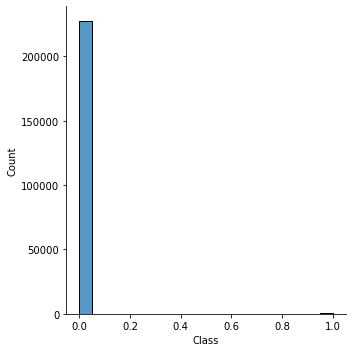

In [15]:
sns.displot(train['Class'],kde=False)

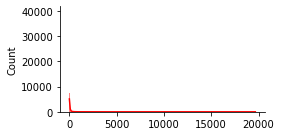

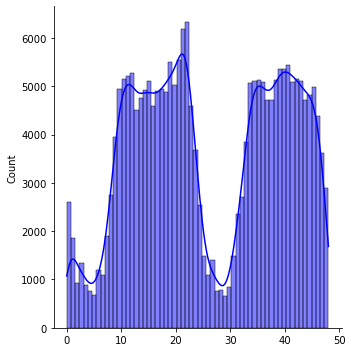

In [16]:
#Here we are finding if the data is skewed as if there is any skewed data it willbe great impact on the prediction.There are high chances that the model will be overfitting.It affects the regression intercept, coefficients associated with the model.

amount_val = train['Amount'].values
time_val = train['Time'].values

sns.displot(amount_val, color='r',kde=True,height=2, aspect=2)

sns.displot(time_val, color='b',kde=True)
plt.show()

Obs: By seeing the distributions we can have an idea how skewed are these features.

#determine index for continuos variables num_feats=train.dtypes[train.dtypes!='object'].index #calculate skew and sort skew_feats=train[num_feats].skew().sort_values(ascending=False) skewness=pd.DataFrame({'Skew':skew_feats}) skewness We can see from below that how all the features are skewed and how much

In [341]:
X= train.drop('Class',axis=1)
y= train.Class

In [188]:
#Adjusting the imbalance dataset using SMOTE,Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes. 
#Synthetic data are created only for the training set without affecting the validation set and test set.
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 227451), (1, 227451)]


In [189]:
y_resampled=pd.DataFrame(y_resampled)

In [190]:
train_new=X_resampled.join(y_resampled,lsuffix="_left")
#Finding if there is any connection(Correlation) between Time, Amount, and the transaction being fraudulent(Class).
train_new[['Time','Class','Amount']].corr()


,Time,Class,Amount
Time,1.000000,-0.158734,0.008782
Class,-0.158734,1.000000,0.072790
Amount,0.008782,0.072790,1.000000


In [21]:
train_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,10.654167,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,6.265278,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,0.675278,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,24.103611,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,35.333889,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [22]:
train_new.shape

(454902, 31)

In [23]:
corr = train_new.corr() 
c1 = corr.abs().unstack().drop_duplicates()
c1.sort_values(ascending = False)
#Here v4 and V11 are large positive value (near to 1.0) indicates a strong positive correlation, notice how the higher these values are, the more likely the end result will be a fraud transaction.
#Here v12 and v14 are large negative value (near to -1.0) indicates a strong negative correlation, notice how the lower these values are, the more likely the end result will be a fraud transaction

Time  Time      1.000000
V16   V17       0.954646
V17   V18       0.940009
V11   V12       0.906523
V16   V18       0.906238
                  ...   
V14   V23       0.000848
V23   V26       0.000801
V1    V21       0.000419
V23   Class     0.000260
V17   Amount    0.000037
Length: 466, dtype: float64

<AxesSubplot:>

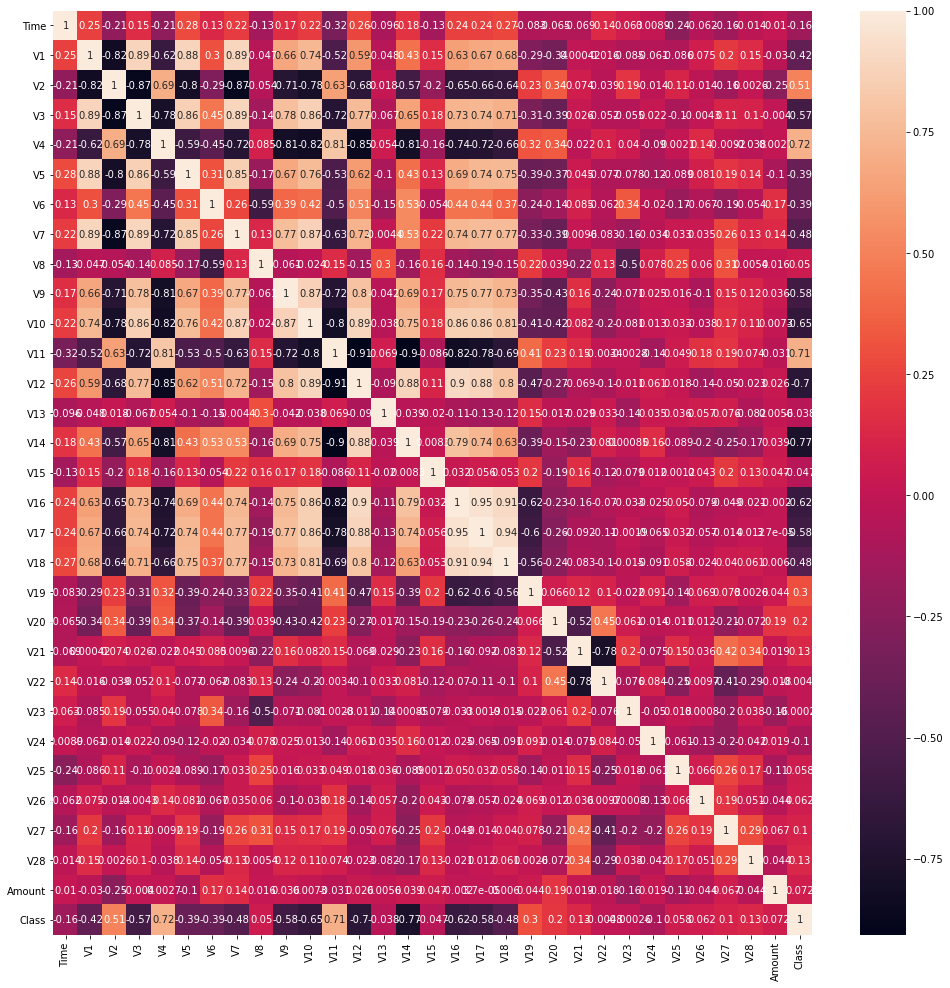

In [24]:
## draw a heatmap for correlation
plt.figure(figsize=(17,17))
sns.heatmap(train_new.corr(),annot=True)
# correlation matrix is taken for the balanced data as imbalance will affect the correlation

In [342]:
X_test_Hidden= test_Hidden.drop('Class',axis=1)
y_test_Hidden= test_Hidden.Class

In [192]:
X_train= train_new.drop('Class',axis=1)
y_train= train_new.Class

compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

## Modeling using balanced data 

In [27]:
#LOgistic regression modelling using SMOTE-Balanced data
lr= LogisticRegression()
#Train the model using the training sets
lr.fit(X_train,y_train)

C:\Users\sanja\Anaconda3\envs\Env_tensor_flow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [28]:
#Predict the response for test dataset
y_predictions = lr.predict(X_test_Hidden)

print("Mean Absolute Error_LR:", mean_absolute_error(y_test_Hidden, y_predictions))
print("Accuracy_Score_LR :",accuracy_score(y_test_Hidden, y_predictions))
print("f1_score_test_hidden_LR      : ", f1_score(y_test_Hidden, y_predictions, average="macro"))
print("precision_score_test_hidden_LR: ", precision_score(y_test_Hidden, y_predictions, average="macro"))
print("recall_score_test_hidden_LR   : ", recall_score(y_test_Hidden, y_predictions, average="macro"))
print("confusion matrix_LR:",confusion_matrix(y_test_Hidden, y_predictions))
print("ROC_curve_LR:",roc_curve(y_test_Hidden, y_predictions))

Mean Absolute Error_LR: 0.021435342860152383
Accuracy_Score_LR : 0.9785646571398476
f1_score_test_hidden_LR      :  0.5563120859867007
precision_score_test_hidden_LR:  0.5330968494189073
recall_score_test_hidden_LR   :  0.928144882742067
confusion matrix_LR: [[55655  1209]
 [   12    86]]
ROC_curve_LR: (array([0.        , 0.02126125, 1.        ]), array([0.        , 0.87755102, 1.        ]), array([2, 1, 0], dtype=int64))


In [29]:
#Scaling the train dataset 
scaler=StandardScaler()
#scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)

In [30]:
#Create a svm Classifier
clf =svm.SVC()

#Train the model using the training sets
clf.fit(X_train_scaled,y_train)

SVC()

In [31]:
#Scaling the test dataset
scaler=StandardScaler()
X_test_Hidden_scaled=scaler.fit_transform(X_test_Hidden)

In [32]:
#Predict the response for test dataset
y_pred_SVM = clf.predict(X_test_Hidden_scaled)

In [33]:
print("Accuracy_Score_SVM :",accuracy_score(y_pred_SVM,y_test_Hidden))
print("f1_score_test_hidden_SVM     : ", f1_score(y_test_Hidden,  y_pred_SVM, average="macro"))
print("precision_score_test_hidden_SVM: ", precision_score(y_test_Hidden,  y_pred_SVM, average="macro"))
print("recall_score_test_hidden_SVM  : ", recall_score(y_test_Hidden,  y_pred_SVM, average="macro"))
print("confusion matrix_SVM:",confusion_matrix(y_test_Hidden, y_pred_SVM))
print("ROC_curve_SVM:",roc_curve(y_test_Hidden, y_pred_SVM))

Accuracy_Score_SVM : 0.591025596011376
f1_score_test_hidden_SVM     :  0.3718351015744261
precision_score_test_hidden_SVM:  0.4988751570342074
recall_score_test_hidden_SVM  :  0.34186131895076544
confusion matrix_SVM: [[33657 23207]
 [   89     9]]
ROC_curve_SVM: (array([0.       , 0.4081141, 1.       ]), array([0.        , 0.09183673, 1.        ]), array([2, 1, 0], dtype=int64))


#normalize your data if you're using Gaussian naive Bayes,t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA).
#for Box-Cox Transformation
from scipy import stats
X_train_normalized = stats.boxcox(X_train)

In [34]:
#Create a Navie Bayes Classifier
gnb = GaussianNB()
#Train the model using the training sets and predict the response for test dataset
y_pred_NB= gnb.fit(X_train,y_train).predict(X_test_Hidden)

In [35]:
print("Accuracy_Score_NB :",accuracy_score(y_pred_NB,y_test_Hidden))
print("f1_score_test_hidden_NB    : ", f1_score(y_test_Hidden,  y_pred_NB, average="macro"))
print("precision_score_test_hidden_NB: ", precision_score(y_test_Hidden,  y_pred_NB, average="macro"))
print("recall_score_test_hidden_NB  : ", recall_score(y_test_Hidden,  y_pred_NB, average="macro"))
print("confusion matrix_NB:",confusion_matrix(y_test_Hidden,  y_pred_NB))
print("ROC_curve_NB:",roc_curve(y_test_Hidden,  y_pred_NB))

Accuracy_Score_NB : 0.9743688774972789
f1_score_test_hidden_NB    :  0.5428825023437267
precision_score_test_hidden_NB:  0.5261188712732734
recall_score_test_hidden_NB  :  0.8954838899544061
confusion matrix_NB: [[55422  1442]
 [   18    80]]
ROC_curve_NB: (array([0.        , 0.02535875, 1.        ]), array([0.        , 0.81632653, 1.        ]), array([2, 1, 0], dtype=int64))


## After performing SVM, Naive Bayes, LogisticRegression with balancing the class using SMOTE. The best performing model is LogisticRegression with 0.55 F1_score

#### Week2:
Try out models like Naive Bayes, Logistic Regression or SVM. Find out which one performs the best
Use different Tree-based classifiers like Random Forest and XGBoost. 
       a.    Remember Tree-based classifiers work on two ideologies: Bagging or Boosting
       b.    Tree-based classifiers have fine-tuning parameters which takes care of the imbalanced class. Random-Forest and XGBboost.
Compare the results of 1 with 2 and check if there is any incremental gain.

### Modelling using imbalance data

In [36]:
#Logistic regression modelling using Imbalanced data
lr1= LogisticRegression()
lr1.fit(X,y)

C:\Users\sanja\Anaconda3\envs\Env_tensor_flow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [37]:
#Predict the response for test dataset
y_predictions_lr = lr1.predict(X_test_Hidden)

print("Mean Absolute Error_LR:", mean_absolute_error(y_predictions_lr,y_test_Hidden))
print("Accuracy_Score_LR :",accuracy_score(y_predictions_lr,y_test_Hidden))
print("f1_score_test_hidden_LR      : ", f1_score(y_test_Hidden, y_predictions_lr, average="macro"))
print("precision_score_test_hidden_LR: ", precision_score(y_test_Hidden, y_predictions_lr, average="macro"))
print("recall_score_test_hidden_LR   : ", recall_score(y_test_Hidden, y_predictions_lr, average="macro"))
print("confusion matrix_LR:",confusion_matrix(y_test_Hidden, y_predictions_lr))

Mean Absolute Error_LR: 0.0008075559144692953
Accuracy_Score_LR : 0.9991924440855307
f1_score_test_hidden_LR      :  0.8660768755203079
precision_score_test_hidden_LR:  0.925368053681582
recall_score_test_hidden_LR   :  0.821331849425195
confusion matrix_LR: [[56853    11]
 [   35    63]]


In [38]:
#Train the model using the training sets and predict the response for test dataset using Navie Bayes CLassifier
gnb = GaussianNB()
y_pred_NB1= gnb.fit(X,y).predict(X_test_Hidden)

In [39]:
print("Accuracy_Score_NB :",accuracy_score(y_pred_NB1,y_test_Hidden))
print("f1_score_test_hidden_NB      : ", f1_score(y_test_Hidden, y_pred_NB1, average="macro"))
print("precision_score_test_hidden_NB: ", precision_score(y_test_Hidden, y_pred_NB1, average="macro"))
print("recall_score_test_hidden_NB  : ", recall_score(y_test_Hidden, y_pred_NB1, average="macro"))
print("confusion matrix_NB:",confusion_matrix(y_test_Hidden, y_pred_NB1))

Accuracy_Score_NB : 0.9778624346055265
f1_score_test_hidden_NB      :  0.5506940864249563
precision_score_test_hidden_NB:  0.5300725589076771
recall_score_test_hidden_NB  :  0.8972336789245805
confusion matrix_NB: [[55621  1243]
 [   18    80]]


# ENSEMBLE LEARNING

In [40]:
#Random Forest Classifier 
classifier=RandomForestClassifier()

In [41]:
#Train the model using the training sets
classifier.fit(X,y)
#Predict the response for test dataset
y_pred_rf = classifier.predict(X_test_Hidden)

In [42]:
print("Accuracy_Score_RF :",accuracy_score(y_pred_rf,y_test_Hidden))
print("f1_score_test_hidden_RF      : ", f1_score(y_test_Hidden, y_pred_rf, average="macro"))
print("precision_score_test_hidden_RF: ", precision_score(y_test_Hidden, y_pred_rf, average="macro"))
print("recall_score_test_hidden_RF  : ", recall_score(y_test_Hidden, y_pred_rf, average="macro"))
print("confusion matrix_RF:",confusion_matrix(y_test_Hidden, y_pred_rf))

Accuracy_Score_RF : 0.9994557775359011
f1_score_test_hidden_RF      :  0.9092204650036091
precision_score_test_hidden_RF:  0.9792059615251714
recall_score_test_hidden_RF  :  0.8571164784146635
confusion matrix_RF: [[56861     3]
 [   28    70]]


In [43]:
#XG Boost Classifier
xb = xgb.XGBClassifier(learning_rate=0.001, max_depth=1, n_estimators=1, scale_pos_weight=99.827, n_jobs=5)

In [44]:
#Train the model using the training sets
xb.fit(X , y,eval_metric='logloss',verbose=True)

XGBClassifier(learning_rate=0.001, max_depth=1, n_estimators=1, n_jobs=5,
              scale_pos_weight=99.827)

In [45]:
#Predict the response for test dataset
xgb_predict=xb.predict(X_test_Hidden)

#cm_xgb = confusion_matrix(xgb_predict,y_test_Hidden.sample(n = 56962))
#sns.heatmap(cm_xgb,annot=True)
print("Accuracy_Score_XGB :",accuracy_score(xgb_predict,y_test_Hidden))
print("f1_score_XGB       : ", f1_score(y_test_Hidden, xgb_predict, average="macro"))
print("recall_score_XGB  : ", recall_score(y_test_Hidden, xgb_predict, average="macro"))
print("precision_score_XGB: ", precision_score(y_test_Hidden, xgb_predict, average="macro"))
print("confusion matrix_XGB:",confusion_matrix(y_test_Hidden, xgb_predict))

Accuracy_Score_XGB : 0.9961377760612338
f1_score_XGB       :  0.7064780552080703
recall_score_XGB  :  0.896200601793897
precision_score_XGB:  0.6401113531586698
confusion matrix_XGB: [[56664   200]
 [   20    78]]


In [46]:
#Random Forest Classifier 
clf=RandomForestClassifier()

In [47]:
#Train the model using the training sets
clf.fit(X,y)
#Predict the response for test dataset
y_pred_rf_test = clf.predict(test)

In [48]:
print("Accuracy_Score_RF :",accuracy_score(y_pred_rf_test,y_test_Hidden))
print("f1_score_test_hidden_RF      : ", f1_score(y_test_Hidden, y_pred_rf_test, average="macro"))
print("precision_score_test_hidden_RF: ", precision_score(y_test_Hidden, y_pred_rf_test, average="macro"))
print("recall_score_test_hidden_RF  : ", recall_score(y_test_Hidden, y_pred_rf_test, average="macro"))
print("confusion matrix_RF:",confusion_matrix(y_test_Hidden, y_pred_rf_test))

Accuracy_Score_RF : 0.999420666409185
f1_score_test_hidden_RF      :  0.9033637208102937
precision_score_test_hidden_RF:  0.9723478574113444
recall_score_test_hidden_RF  :  0.8520056446889392
confusion matrix_RF: [[56860     4]
 [   29    69]]


## Obs: After modeling imbalance data Logistic Regression, SVM, Naive bayes, Random Forest and XG boost. The best model performance is Random forest Classifier.

#### Week3:
Applying ANN:

Use ANN (Artificial Neural Network) to identify fradulent and non-fradulent.
       a)    Fine-tune number of layers
       b)    Number of Neurons in each layers
       c)    Experiment in batch-size
       d)    Experiment with number of epochs. Check the observations in loss and accuracy
       e)    Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop
       f)    Find out which activation performs best for this use case and why?
       g)    Check Confusion Matrix, Precision, Recall and F1-Score
2.    Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from
       above. 
3.    Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use
       techniques like Grid Search, Cross-Validation and Random search.

Anomaly Detection:

4.     Implement anomaly detection algorithms.
        a)    Assume that the data is coming from a single or a combination of multivariate Gaussian
        b)    Formalize a scoring criterion, which gives a scoring probability for the given data point whether it belongs to the
              multivariate Gaussian or Normal Distribution fitted in a)

In [49]:
import tensorflow as tf

## Using dropout concept in th ANN classifier

In [50]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Normalize input data-30- because of the shape of the X_train
model.add(tf.keras.layers.BatchNormalization(input_shape=(30,)))

#Add Dense Layer  1
model.add(tf.keras.layers.Dense(11, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

#Add Dense Layer  2
model.add(tf.keras.layers.Dense(18, activation='tanh'))
model.add(tf.keras.layers.Dropout(0.3))

#Add Dense Layer which provides 1 Output after applying sigmoid 
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Compile the model
model.compile('adam',loss='BinaryCrossentropy',metrics=['acc',f1_m,precision_m, recall_m])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=0.7),tf.keras.callbacks.ModelCheckpoint(filepath='Finance_prj_best_model2.h5',save_best_only=True)]


In [51]:
model.fit(X_train,y_train,validation_data=(X_test_Hidden,y_test_Hidden), epochs=10,batch_size=10,callbacks = callbacks)


Epoch 1/10
45491/45491 [==============================] - 98s 2ms/step - loss: 0.1823 - acc: 0.9318 - f1_m: 0.9256 - precision_m: 0.9556 - recall_m: 0.9156 - val_loss: 0.0719 - val_acc: 0.9886 - val_f1_m: 0.0141 - val_precision_m: 0.0138 - val_recall_m: 0.0146
Epoch 2/10
45491/45491 [==============================] - 79s 2ms/step - loss: 0.1649 - acc: 0.9388 - f1_m: 0.9329 - precision_m: 0.9554 - recall_m: 0.9283 - val_loss: 0.0594 - val_acc: 0.9903 - val_f1_m: 0.0140 - val_precision_m: 0.0137 - val_recall_m: 0.0146
Epoch 3/10
45491/45491 [==============================] - 79s 2ms/step - loss: 0.1630 - acc: 0.9399 - f1_m: 0.9336 - precision_m: 0.9533 - recall_m: 0.9315 - val_loss: 0.0623 - val_acc: 0.9898 - val_f1_m: 0.0141 - val_precision_m: 0.0138 - val_recall_m: 0.0147
Epoch 4/10
45491/45491 [==============================] - 80s 2ms/step - loss: 0.1616 - acc: 0.9409 - f1_m: 0.9348 - precision_m: 0.9540 - recall_m: 0.9328 - val_loss: 0.0591 - val_acc: 0.9882 - val_f1_m: 0.0142 - val

In [343]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Normalize input data-30- because of the shape of the X_train
model.add(tf.keras.layers.BatchNormalization(input_shape=(30,)))

#Add Dense Layer  1
model.add(tf.keras.layers.Dense(11, activation='relu'))

#Add Dense Layer  2
model.add(tf.keras.layers.Dense(18, activation='tanh'))

#Add Dense Layer which provides 1 Output after applying sigmoid 
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Compile the model
model.compile('adam',loss='BinaryCrossentropy',metrics=['acc',f1_m,precision_m, recall_m])

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=0.7),tf.keras.callbacks.ModelCheckpoint(filepath='Finance_prj_best_model1.h5',save_best_only=True)]

In [344]:
model.fit(X,y,validation_data=(X_test_Hidden,y_test_Hidden),epochs=10,batch_size=10,callbacks = callbacks)


Epoch 1/10
22785/22785 [==============================] - 54s 2ms/step - loss: 0.0061 - acc: 0.9986 - f1_m: 0.0128 - precision_m: 0.0128 - recall_m: 0.0127 - val_loss: 0.0035 - val_acc: 0.9993 - val_f1_m: 0.0128 - val_precision_m: 0.0127 - val_recall_m: 0.0128
Epoch 2/10
22785/22785 [==============================] - 54s 2ms/step - loss: 0.0032 - acc: 0.9994 - f1_m: 0.0137 - precision_m: 0.0137 - recall_m: 0.0136 - val_loss: 0.0038 - val_acc: 0.9993 - val_f1_m: 0.0128 - val_precision_m: 0.0127 - val_recall_m: 0.0128
Epoch 3/10
22785/22785 [==============================] - 54s 2ms/step - loss: 0.0031 - acc: 0.9994 - f1_m: 0.0134 - precision_m: 0.0134 - recall_m: 0.0134 - val_loss: 0.0037 - val_acc: 0.9993 - val_f1_m: 0.0128 - val_precision_m: 0.0127 - val_recall_m: 0.0128
Epoch 4/10
22785/22785 [==============================] - 54s 2ms/step - loss: 0.0032 - acc: 0.9994 - f1_m: 0.0135 - precision_m: 0.0135 - recall_m: 0.0135 - val_loss: 0.0037 - val_acc: 0.9992 - val_f1_m: 0.0128 - val

Trying ANN without drouput

In [287]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Normalize input data-30- because of the shape of the X_train
model.add(tf.keras.layers.BatchNormalization(input_shape=(30,)))

#Add Dense Layer  1
model.add(tf.keras.layers.Dense(11, activation='relu'))

#Add Dense Layer  2
model.add(tf.keras.layers.Dense(18, activation='tanh'))

#Add Dense Layer which provides 1 Output after applying sigmoid 
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Compile the model
model.compile('adam',loss='BinaryCrossentropy',metrics=['acc',f1_m,precision_m, recall_m])

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=0.7),tf.keras.callbacks.ModelCheckpoint(filepath='Finance_prj_best_model4.h5',save_best_only=True)]



In [292]:
model.fit(X_train,y_train, epochs=10,batch_size=10,callbacks = callbacks)


Epoch 1/10
45491/45491 [==============================] - 93s 2ms/step - loss: 0.0900 - acc: 0.9651 - f1_m: 0.9615 - precision_m: 0.9695 - recall_m: 0.9629
Epoch 2/10
45491/45491 [==============================] - 99s 2ms/step - loss: 0.0888 - acc: 0.9655 - f1_m: 0.9617 - precision_m: 0.9695 - recall_m: 0.9632
Epoch 3/10
45491/45491 [==============================] - 99s 2ms/step - loss: 0.0881 - acc: 0.9658 - f1_m: 0.9619 - precision_m: 0.9693 - recall_m: 0.9636
Epoch 4/10
45491/45491 [==============================] - 84s 2ms/step - loss: 0.0885 - acc: 0.9659 - f1_m: 0.9621 - precision_m: 0.9695 - recall_m: 0.9637
Epoch 5/10
45491/45491 [==============================] - 80s 2ms/step - loss: 0.0886 - acc: 0.9657 - f1_m: 0.9620 - precision_m: 0.9699 - recall_m: 0.9633
Epoch 6/10
45491/45491 [==============================] - 76s 2ms/step - loss: 0.0882 - acc: 0.9659 - f1_m: 0.9623 - precision_m: 0.9700 - recall_m: 0.9636
Epoch 7/10
45491/45491 [==============================] - 75s 2m

In [297]:
y_test_pred_ann = model.predict(test)
y_test_pred_ann

array([[0.00037926],
       [0.01260841],
       [0.00026026],
       ...,
       [0.00149658],
       [0.000714  ],
       [0.005775  ]], dtype=float32)

In [298]:
y_test_pred_ann_copy = [1 if x>=0.5 else 0 for x in y_test_pred_ann]
y_test_pred_ann_series = pd.Series(y_test_pred_ann_copy)
y_test_pred_ann_series

0        0
1        0
2        0
3        0
4        0
        ..
56957    0
56958    0
56959    0
56960    0
56961    0
Length: 56962, dtype: int64

In [299]:
y_test_Hidden_pred_ann = model.predict(X_test_Hidden)
y_test_Hidden_pred_ann

array([[0.00037926],
       [0.01260841],
       [0.00026026],
       ...,
       [0.00149658],
       [0.000714  ],
       [0.005775  ]], dtype=float32)

In [300]:
y_test_Hidden_pred_ann_copy = [1 if x>=0.5 else 0 for x in y_test_Hidden_pred_ann]
y_test_Hidden_pred_ann_series = pd.Series(y_test_Hidden_pred_ann_copy)
y_test_Hidden_pred_ann_series

0        0
1        0
2        0
3        0
4        0
        ..
56957    0
56958    0
56959    0
56960    0
56961    0
Length: 56962, dtype: int64

In [306]:
print("confusion matrix_ANN:",confusion_matrix(y_test_Hidden_pred_ann_series,y_test_Hidden))

confusion matrix_ANN: [[56173    15]
 [  691    83]]


## Finding the best optimizer for neural net using Grid Search

In [88]:
#function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999065 using {'optimizer': 'Adamax'}
0.998262 (0.000173) with: {'optimizer': 'SGD'}
0.998920 (0.000439) with: {'optimizer': 'RMSprop'}
0.998670 (0.000279) with: {'optimizer': 'Adagrad'}
0.995888 (0.002661) with: {'optimizer': 'Adadelta'}
0.998345 (0.000118) with: {'optimizer': 'Adam'}
0.999065 (0.000190) with: {'optimizer': 'Adamax'}
0.998363 (0.000127) with: {'optimizer': 'Nadam'}


#### Best: 0.999065 using optimizer: Adamax

In [345]:
#function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model,verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size,epochs = epochs )
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.997835 using {'batch_size': 10, 'epochs': 100}
0.982717 (0.011001) with: {'batch_size': 10, 'epochs': 10}
0.997613 (0.001266) with: {'batch_size': 10, 'epochs': 50}
0.997835 (0.001018) with: {'batch_size': 10, 'epochs': 100}
0.989101 (0.002815) with: {'batch_size': 20, 'epochs': 10}
0.997782 (0.001472) with: {'batch_size': 20, 'epochs': 50}
0.997344 (0.002109) with: {'batch_size': 20, 'epochs': 100}
0.979903 (0.013023) with: {'batch_size': 40, 'epochs': 10}
0.995617 (0.001717) with: {'batch_size': 40, 'epochs': 50}
0.997122 (0.002255) with: {'batch_size': 40, 'epochs': 100}
0.983194 (0.008676) with: {'batch_size': 60, 'epochs': 10}
0.994814 (0.002243) with: {'batch_size': 60, 'epochs': 50}
0.995869 (0.002424) with: {'batch_size': 60, 'epochs': 100}
0.978984 (0.003978) with: {'batch_size': 80, 'epochs': 10}
0.993251 (0.004402) with: {'batch_size': 80, 'epochs': 50}
0.995304 (0.002318) with: {'batch_size': 80, 'epochs': 100}
0.983058 (0.001835) with: {'batch_size': 100, 'epochs':

### Best: 0.997835 using batch_size: 10, epochs: 100

## Anamoly Detection using Isolation Forest

In [268]:
Fraud = train[train['Class'] == 1]
Valid = train[train['Class'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(train[train['Class'] == 1])))
print('Valid Transactions: {}'.format(len(train[train['Class'] == 0])))

0.0017322412299792043
Fraud Cases: 394
Valid Transactions: 227451


In [269]:
max_features=1.0
n_estimators=50
max_samples='auto'
contamination=outlier_fraction#float(0.98)
forest_model=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
forest_model.fit(X,y)

IsolationForest(contamination=0.0017322412299792043, n_estimators=50)

In [270]:
train['scores']=forest_model.decision_function(X)
train['anomaly_Value']=forest_model.predict(X)
train.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scores,anomaly_Value
0,10.654167,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0,0.281633,1
1,6.265278,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0,0.131427,1
2,0.675278,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0,0.233846,1
3,24.103611,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0,0.296954,1
4,35.333889,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0,0.253828,1
5,10.441667,-6.341667,1.192815,-3.686579,-2.754006,-5.007164,3.988118,1.693606,-13.577522,2.557965,...,-1.507217,-0.179185,0.002092,-0.019168,3.611243,-0.894494,1437.08,0,-0.016495,-1
6,15.760833,-0.463928,0.204745,2.795734,1.546200,-0.720374,1.108212,-0.581133,0.544075,1.099843,...,-0.100344,0.126248,-0.461584,-0.200985,0.280168,0.180046,11.10,0,0.245224,1
7,0.253333,-1.394619,0.554224,-0.617805,-0.313706,2.157413,3.537534,-0.567305,1.380888,-0.112291,...,-0.124758,1.046780,-0.089474,0.363674,0.215692,0.225698,24.08,0,0.245667,1
8,47.516111,-2.121785,-1.518485,2.667942,-2.458839,-1.414952,0.807935,-1.870160,0.516477,-0.553359,...,-1.000976,-0.212991,0.420722,-0.019645,-0.482792,-0.407780,28.00,0,0.181912,1
9,22.069444,-2.254788,-0.955967,0.590596,0.114744,-5.876531,3.364858,6.365904,-1.252960,0.243849,...,0.517855,0.534361,0.494493,0.301414,0.507071,-0.560888,1354.98,0,0.162581,1


In [271]:
outliers_counter=len(train['anomaly_Value']==-1)
outliers_counter

227845

In [272]:
print("Accuracy percentage:", 100*list(train['anomaly_Value']).count(-1)/(outliers_counter))

Accuracy percentage: 0.1733634707805745


In [274]:
max_features=1.0
n_estimators=50
max_samples='auto'
contamination=outlier_fraction#float(0.001)
Iso=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
Iso.fit(X_test_Hidden,y_test_Hidden)


IsolationForest(contamination=0.0017322412299792043, n_estimators=50)

In [275]:
test_Hidden['scores']=Iso.decision_function(X_test_Hidden)
test_Hidden['anomaly_Value']=Iso.predict(X_test_Hidden)
test_Hidden.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scores,anomaly_Value
0,31.402778,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,...,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0,0.264971,1
1,7.407500,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,...,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0,0.218170,1
2,44.310833,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,...,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0,0.240196,1
3,38.206944,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,...,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0,0.281682,1
4,17.602500,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,...,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0,0.269079,1
5,15.296944,0.441380,-2.217230,0.802581,-0.127056,-1.867945,0.495430,-0.741205,0.214230,-0.198782,...,-0.316073,0.288840,0.103051,-0.289289,-0.010973,0.085977,423.70,0,0.244167,1
6,37.674722,1.937007,0.394490,-0.860965,3.720728,0.458475,0.159445,0.017991,0.024848,-0.615042,...,0.030587,0.633156,0.198230,0.219840,-0.049470,-0.048914,10.59,0,0.208345,1
7,9.345278,-0.552654,-0.279974,2.626373,0.535665,-1.350645,0.523387,0.124452,0.076345,-0.800457,...,0.152325,0.322421,-0.217550,-0.179712,-0.010302,-0.087118,137.00,0,0.249225,1
8,22.424722,-2.760629,2.206112,-0.193100,0.764237,-0.718603,-0.920526,0.228957,0.507112,0.084184,...,0.083789,0.412720,0.093874,-0.336316,0.084779,0.490768,40.11,0,0.275670,1
9,0.686944,-0.287085,0.061850,1.389693,-0.844605,-0.756236,-0.702512,0.256420,-0.056059,-1.814368,...,0.064802,0.547049,-0.537486,1.039433,0.044394,0.120748,51.70,0,0.263890,1


In [276]:
outliers_counter=len(test_Hidden['anomaly_Value']==-1)
outliers_counter

56962

In [277]:
print("Accuracy percentage:", 100*list(test_Hidden['anomaly_Value']).count(-1)/(outliers_counter))

Accuracy percentage: 0.17380007724447877


In [278]:
y_pred = Iso.predict(X_test_Hidden)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

fpr, tpr, thresholds = roc_curve(y_test_Hidden,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [280]:
y_score = -forest_model.decision_function(X)

In [281]:
roc_auc_score(y, y_score)

0.9493818125204722

In [286]:
y_score_test = -Iso.decision_function(X_test_Hidden)
roc_auc_score(y_test_Hidden, y_score_test)

0.9448034982141421

In [282]:
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred

array([0, 0, 0, ..., 0, 0, 0])

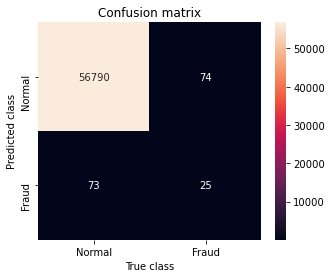

In [283]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test_Hidden, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.xlabel('True class')
plt.ylabel('Predicted class')
plt.show()

In [284]:
print('The Model used is {}'.format('Isolation Forest'))
acc= accuracy_score(y_test_Hidden, y_pred)
print('The accuracy is {}'.format(acc))
prec= precision_score(y_test_Hidden, y_pred)
print('The precision is {}'.format(prec))
rec= recall_score(y_test_Hidden, y_pred)
print('The recall is {}'.format(rec))
f1= f1_score(y_test_Hidden, y_pred)
print('The F1-Score is {}'.format(f1))

The Model used is Isolation Forest
The accuracy is 0.9974193321863699
The precision is 0.25252525252525254
The recall is 0.25510204081632654
The F1-Score is 0.25380710659898476


0.94 is model roc_auc_score on test and train data and threshold for Anoamly detection is 0.0017. Generated by Isolation forest.F1 score is less than the earlier models as Isolation forest cannot handle highly imbalance data.Looks like is Isolation forest did good work on anomaly detection 

##### Week 4:
1.Visualize the scores for Fraudulent and Non-Fraudulent transactions.
2.Find out the threshold value for marking or reporting a transaction as fraudulent in your anomaly detection system.
3.Can this score be used as an engineered feature in the models developed previously? Are there any incremental gains in F1-Score? Why or Why not?
4.Be as creative as possible in finding other interesting insights.

## Inference and Observations:

### Visualize the scores for Fraudulent and Non-Fraudulent transactions

In [307]:
df = pd.DataFrame({'Actual_y':y_test_Hidden , 'predictions': y_test_Hidden_pred_ann_series}, columns=['Actual_y', 'predictions'])
df

,Actual_y,predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
56957,0,0
56958,0,0
56959,0,0
56960,0,0


<AxesSubplot:>

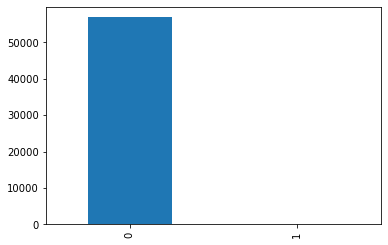

In [311]:
# Fraud and non-fraud actual y for test_Hidden
df['Actual_y'].value_counts().plot(kind='bar')

In [310]:
df['Actual_y'].value_counts()

0    56864
1       98
Name: Actual_y, dtype: int64

<AxesSubplot:>

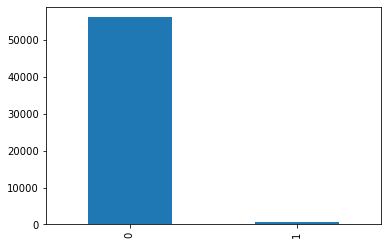

In [312]:
# Fraud and non-fraud predicted y for test_Hidden
df['predictions'].value_counts().plot(kind='bar')

In [313]:
df['predictions'].value_counts()

0    56188
1      774
Name: predictions, dtype: int64

In [314]:
#Original test set class predictions
y_test_pred_ann_series.value_counts()

0    56188
1      774
dtype: int64

In [316]:
cm=confusion_matrix(y_test_Hidden,y_test_Hidden_pred_ann_series)
cm

array([[56173,   691],
       [   15,    83]], dtype=int64)

In [318]:
accuracy=accuracy_score(y_test_Hidden,y_test_Hidden_pred_ann_series)
accuracy

0.9876057722692321

### From the above we have learned that model predicted more fraud transactions(i.e., false positive) than the given dataset.
The confusion matrix output means that deep learning model made 56173 + 83 correct predictions and 691+ 15 wrong predictions. You can calculate the accuracy with: (56173 + 83) / 56962. The total number of observations in your dataset is 56962. This gives you an accuracy of 98.7%. This is a very good accuracy rate since we achieved 98% correct predictions from model.

### 0.94 is Isolation forest model roc_auc_score on test and train data, threshold for Anoamly detection is 0.0017

## Can F1 score be used as an engineered feature in the models developed previously? Are there any incremental gains in F1-Score? Why or Why not? 
F1 score is higher for ANN Deep Learning model and Random Forest model. It was improved as the models did good work in balancing the data and finding fraud transactions.

<AxesSubplot:>

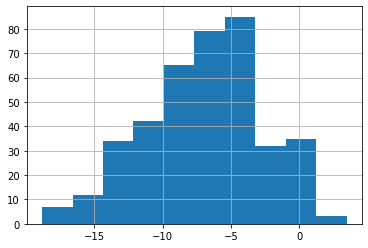

In [327]:
#Be as creative as possible in finding other interesting insights.
train[train['Class']==1].V14.hist(bins=10)

<AxesSubplot:>

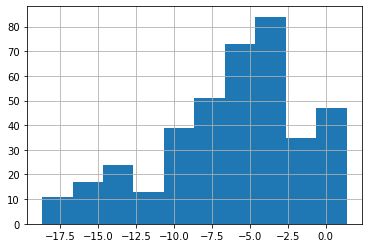

In [328]:
train[train['Class']==1].V12.hist(bins=10)

<AxesSubplot:>

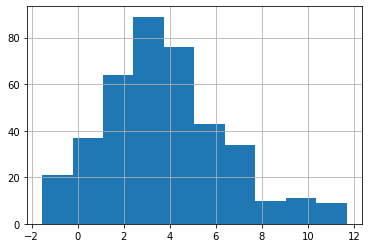

In [329]:
train[train['Class']==1].V11.hist(bins=10)

<AxesSubplot:>

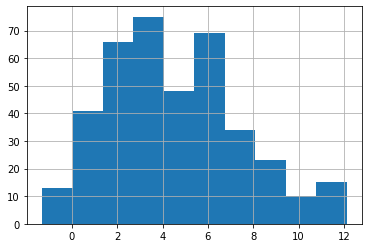

In [330]:
train[train['Class']==1].V4.hist(bins=10)

In [326]:
test_Hidden[test_Hidden['Class']==1].V14

1847     -5.843528
2265     -9.440375
3060     -9.577194
3418     -7.052311
3691     -1.181669
           ...    
51941    -4.692788
53009   -19.214325
53061    -5.249305
55705    -1.824839
56030     1.322887
Name: V14, Length: 98, dtype: float64

In [331]:
train[train['Class']==1].V14

266      -13.026864
360      -14.094452
421        0.796580
734       -4.757074
854       -9.057993
            ...    
226409    -7.862809
226814   -11.002289
226817   -13.725685
226957    -9.072711
227531    -6.455029
Name: V14, Length: 394, dtype: float64

#### Here v4 and V11 are large positive value (near to 1.0) indicates a strong positive correlation, notice how the higher these values are, the more likely the end result will be a fraud transaction.
#### Here v12 and v14 are large negative value (near to -1.0) indicates a strong negative correlation, notice how the lower these values are, the more likely the end result will be a fraud transaction

https://tel.archives-ouvertes.fr/tel-02457134/file/TH2019MAKKISARA.pdf